Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook from the previous assignment, reproduce the pop1 and pop2 populations and samples, using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

1.
Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

Answer:
The means of both samples and the std of sample 1 changed. The std of sample2 remains practically unchanged 

2.
Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

Answer:
Large change for the mean of sample1, reflecting change in n * p (from 10 * .3 to 10 * .4) 

3.
Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

Answer:
Yes, sample mean values still accurately represents the population values: 10% and 14% chance that difference is due to chance.

In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

1.99
5.14
1.1445086281894077
1.5938632312717422


1.
Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same? Increasing sample size should result in mean and std values closer to population mean and std (more normal).  Dereasing sample size should result in mean and std values farther from population mean and std (less normal).

1.945
4.939
1.2767047426872042
1.6022730728561845


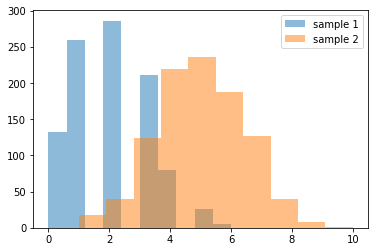

In [5]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)


print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())


plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()


sample1 mean: 

1.65

sample2 mean: 

5.35

sample1 std: 

1.3143439428094914

sample2 std: 

1.5580436450882882


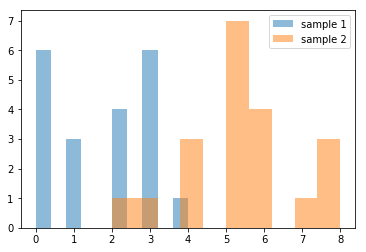

In [11]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

sample1 = np.random.choice(pop1, 20, replace=True)
sample2 = np.random.choice(pop2, 20, replace=True)

print('\nsample1 mean: \n')
print(sample1.mean())
print('\nsample2 mean: \n')
print(sample2.mean())
print('\nsample1 std: \n')
print(sample1.std())
print('\nsample2 std: \n')
print(sample2.std())


plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

2.
Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

Large change for the mean of sample1, reflecting change in n * p (from 10 * .3 to 10 * .4) 

In [17]:
#Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. 

pop1 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

# Compute the difference between the two sample means.
diff_mean = sample2.mean( ) - sample1.mean()


size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  


print('\nsample1 mean: \n')
print(sample1.mean())
print('\nsample2 mean: \n')
print(sample2.mean())
print('\nsample1 std: \n')
print(sample1.std())
print('\nsample2 std: \n')
print(sample2.std())
print('\ndiff_mean (sample2 - sample1: \n')
print(diff_mean)
print('\nt-value: \n')
print(diff_mean/diff_se)

from scipy.stats import ttest_ind

print('\nt-test: \n')
print(ttest_ind(sample2, sample1, equal_var=False))


sample1 mean: 

2.96

sample2 mean: 

5.17

sample1 std: 

1.4894294209528698

sample2 std: 

1.5624019969265273

diff_mean (sample2 - sample1: 

2.21

t-value: 

10.238176580061289

t-test: 

Ttest_indResult(statistic=10.186857076040202, pvalue=7.416840706689633e-20)


In [19]:
#Change the probability value (p in the NumPy documentation) for pop1 to 0.4, then take new samples and compute the t-statistic and p-value. 

pop1 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

# Compute the difference between the two sample means.
diff_mean = sample2.mean( ) - sample1.mean()


size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  


print('\nsample1 mean: \n')
print(sample1.mean())
print('\nsample2 mean: \n')
print(sample2.mean())
print('\nsample1 std: \n')
print(sample1.std())
print('\nsample2 std: \n')
print(sample2.std())
print('\ndiff_mean (sample2 - sample1: \n')
print(diff_mean)
print('\nt-value: \n')
print(diff_mean/diff_se)

from scipy.stats import ttest_ind

print('\nt-test: \n')
print(ttest_ind(sample2, sample1, equal_var=False))


sample1 mean: 

3.96

sample2 mean: 

5.07

sample1 std: 

1.4691494137765568

sample2 std: 

1.4370455803487932

diff_mean (sample2 - sample1: 

1.1100000000000003

t-value: 

5.401156105278598

t-test: 

Ttest_indResult(statistic=5.374082470603925, pvalue=2.1524864227091861e-07)


3.
Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

Yes, sample mean values still accurately represents the population values: 10% and 14% chance that difference is due to chance.

In [8]:
#Use normal distribution
pop1 = np.random.normal(10, .3, 10000)
pop2 = np.random.normal(10, .5, 10000) 

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

# Compute the difference between the two sample means.
diff_mean = sample2.mean( ) - sample1.mean()


size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  


print('\nsample1 mean: \n')
print(sample1.mean())
print('\nsample2 mean: \n')
print(sample2.mean())
print('\nsample1 std: \n')
print(sample1.std())
print('\nsample2 std: \n')
print(sample2.std())
print('\ndiff_mean (sample2 - sample1: \n')
print(diff_mean)
print('\nt-value: \n')
print(diff_mean/diff_se)

from scipy.stats import ttest_ind

print('\nt-test: \n')
print(ttest_ind(sample2, sample1, equal_var=False))


sample1 mean: 

10.062462004476659

sample2 mean: 

9.964583460498012

sample1 std: 

0.2695028179739281

sample2 std: 

0.5293419498640335

diff_mean (sample2 - sample1: 

-0.0978785439786467

t-value: 

-1.6477900441516438

t-test: 

Ttest_indResult(statistic=-1.6395303929202483, pvalue=0.10323983524363628)


In [10]:
#Use normal distribution
pop1 = np.random.normal(10, .4, 10000)
pop2 = np.random.normal(10, .5, 10000) 

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

# Compute the difference between the two sample means.
diff_mean = sample2.mean( ) - sample1.mean()


size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  


print('\nsample1 mean: \n')
print(sample1.mean())
print('\nsample2 mean: \n')
print(sample2.mean())
print('\nsample1 std: \n')
print(sample1.std())
print('\nsample2 std: \n')
print(sample2.std())
print('\ndiff_mean (sample2 - sample1: \n')
print(diff_mean)
print('\nt-value: \n')
print(diff_mean/diff_se)

from scipy.stats import ttest_ind

print('\nt-test: \n')
print(ttest_ind(sample2, sample1, equal_var=False))


sample1 mean: 

10.081228678437464

sample2 mean: 

9.987617117382435

sample1 std: 

0.4277924275917136

sample2 std: 

0.47150301721827353

diff_mean (sample2 - sample1: 

-0.09361156105502921

t-value: 

-1.4703803503729338

t-test: 

Ttest_indResult(statistic=-1.4630099763894993, pvalue=0.1450651234463857)
